<center><h1> Natural Language Processing Project </h1></center>


Data Science & Machine Learning


**Contributors**
- Lynette Wangari - lynettewangari26@gmail.com
- Jackson Munene - jacmwaniki@gmail.com
- Julius Kinyua - juliusczar36@gmail.com
- Philip Oluoch - 

# Business Understanding

## Overview

In today's technologically driven society, social media (especially Twitter) often acts as a central repository for thoughts, feelings, and opinions. Through the use of machine learning and natural language processing, we will identify users who have expressed dissatisfaction with Apple and Google products. The objective is to categorize tweets related to Apple and Google into positive, neutral, and negative sentiments, providing actionable insights for their advertising strategies.

In this project, we seek to understanding user sentiments towards Apple and Google products by leveraging Twitter sentiment analysis to gain insights into customer opinions and preferences regarding the products. The project involves collecting twitter data related to reviews of Apple and Google products, followed by preprocessing and sentiment analysis. The insights derived from this analysis will guide in optimizing its product assortment and ensuring a strategic alighnment with customer prefences.

### Challenges:

The lack of a systematic method for analyzing user sentiments on platforms like Twitter impedes data-driven stocking decisions. This project aims to use Twitter sentiment analysis to better understand customer opinions. By gaining insights into these sentiments to enhance stocking decisions, ensuring products are available in line with customer preferences, ultimately boosting overall satisfaction and loyalty.

### Business Problem:

The primary business problem is to ensure the best possibe experience for customers by accurately prediciting whether a given tweet expresses positive or negative sentiment about Apple or Google products. Misclassifying negative sentiments as positive can lead to misleading insights, which might result in poor strategic decisions.


### Research Questions

- What are the main sentiments expressed by customers on Twitter regarding iPhone and Google products?

- What factors affect the polarity of tweets related to iPhone and Google products on Twitter?

- Which specific features of iPhone and Google products are most commonly praised or criticized by users on Twitter?

- Which machine learning model is the most effective for sentiment analysis?

## Data Understanding

- Contributors evaluated tweets about multiple brands and products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed they were also asked to say which brand or product was the target of that emotion.

- The tweets included were sent out during the South by South West conference, mostly about Google and Apple products that was put together in 2013.

- The dataset includes 9,093 rows. There are three columns, the first column includes the tweet text, the second column is the subject of the tweet and third column is the emotion of the tweet.

- Data comes from CrowdFlower via data.world.

- Human raters rated the sentiment in over 9,000 Tweets as positive, negative, neither or "can't tell". "Can't tell" really is not of much use to us for this analysis and will be dropped.



##  Data Preparation

### Preview the data

Let's first import the various libraries we will use in our analysis and preview the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('tweets.csv', encoding='latin1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


The tweets contain mentions, hashtags, and external links to various websites. In order to make manipulation of the dataframe easier, we will rename the columns to something simpler.

In [5]:
df.rename(columns={'tweet_text':'tweet', 'emotion_in_tweet_is_directed_at':'brand_product', 
                  'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


We have a total of 9093 tweets. Next we will examine the tweets based on sentiment.

In [7]:
#check for null values in columns
df.isna().sum()

tweet               1
brand_product    5802
sentiment           0
dtype: int64

In [59]:
brand_counts = df['brand_product'].value_counts()
brand_counts

brand_product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

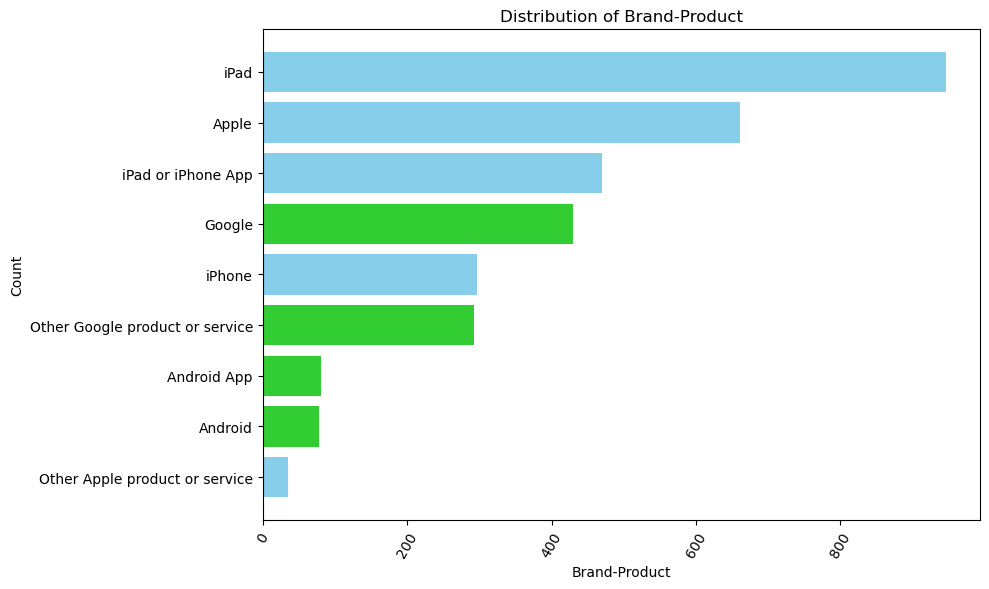

In [61]:
# Brand Value_counts bar plot
brand_counts = brand_counts.sort_values(ascending = True)
plt.figure(figsize=(10, 6))
colors = [
    'skyblue' 
    if brand.lower() in [
        'ipad', 
        'apple', 
        'ipad or iphone app', 
        'iphone', 
        'other apple product or service'
    ] 
    else 'limegreen' for brand in df_counts.index
]

plt.barh(brand_counts.index, df_counts.values, color=colors)
plt.xlabel('Brand-Product')
plt.ylabel('Count')
plt.title('Distribution of Brand-Product')
plt.xticks(rotation=60) 

plt.tight_layout()
plt.show()

In [63]:
senti_counts = df['sentiment'].value_counts()
senti_counts

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

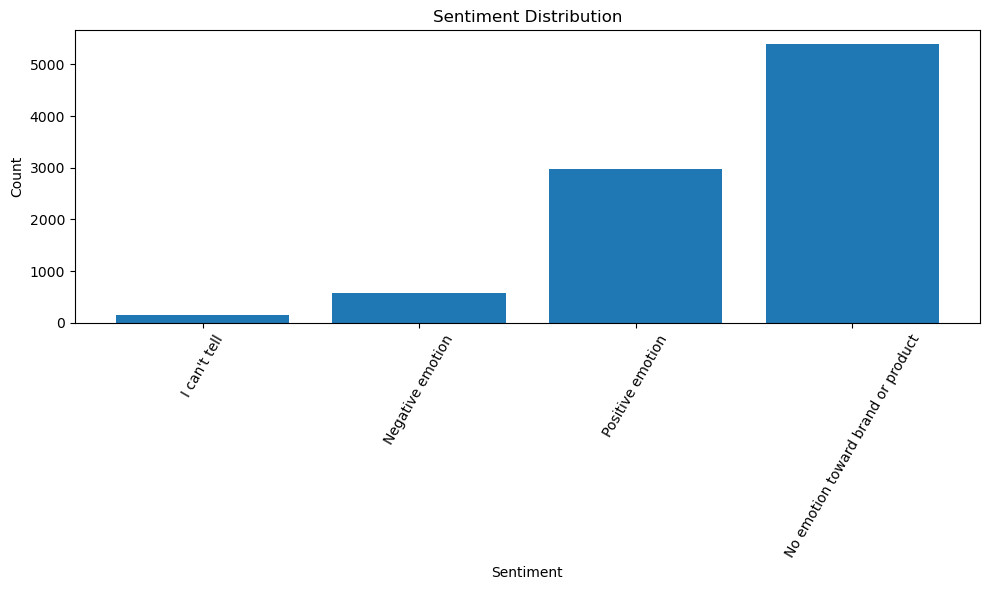

In [69]:
# Sentiment Value_counts bar plot
senti_counts = senti_counts.sort_values(ascending = True)
plt.figure(figsize=(10, 6))


plt.bar(senti_counts.index, senti_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=60) 

plt.tight_layout()
plt.show()

In [9]:
#looking at data, duplicates and null values
print(df.info())
print(("-"*20))
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*20))
print('Total null values')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9092 non-null   object
 1   brand_product  3291 non-null   object
 2   sentiment      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet               1
brand_product    5802
sentiment           0
dtype: int64


In [10]:
#Simplify sentiment labels for visualizations
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive',
             'Negative emotion':'Negative',
             "I can't tell": 'Invalid'}
df['sentiment'] = df['sentiment'].map(dict_sent)

In [11]:
#sentiment breakdown
df['sentiment'].value_counts()

sentiment
No emotion    5389
Positive      2978
Negative       570
Invalid        156
Name: count, dtype: int64

In [115]:
#drop NaN in the Tweet column
df['tweet'].dropna(inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion
9091,Some Verizon iPhone customers complained their...,NaN,No emotion


In [16]:
# Dropping the row above with missing value in tweet_text
df.drop(index=df[df['tweet'].isna()].index, inplace= True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion
9091,Some Verizon iPhone customers complained their...,NaN,No emotion


In [20]:
# Derive 'brand_product' from tweets to fill missing values in former column
categories = np.array(['iPad', 'Apple', 'iPad', 'iPhone', 'Google', 'Android'])
def fill_missing_brand_product(df, categories):
    for i, row in df.iterrows():
        if pd.isnull(row['brand_product']):
            for category in np.concatenate((categories, np.char.lower(categories))):
                if category in row['tweet']:
                    # Use .loc[] to assign values to DataFrame
                    df.loc[i, 'brand_product'] = category
                    break  # Break out of inner loop once a category is found
                    
                    
# Call the function and pass the DataFrame 'data' and 'categories'
fill_missing_brand_product(df, categories)

In [21]:
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",google,No emotion
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion


In [23]:
# drop rows with missing data
df.dropna(inplace= True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",google,No emotion
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion
